In [21]:
import pandas as pd
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\juanv\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\juanv\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\juanv\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\juanv\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\juanv\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [22]:
accion_popular = ['coco_ancachi', 'DarwinEspinozaV', 'wilsonsotop']
alianza_progreso = ['LuchoPiconQ', 'robertochiabra', 'SalhuanaE']
avanza_pais = ['1DianaGonzales', 'adrianatudelag', 'AlejandroCavero', 'Gral_Williams', 'RosselliAmuruz']
fuerza_popular = ['A_Aguinaga', 'CesarManuelRev1', 'ErnesBustamante', 'hventuraangel', 'LizarzaburuJuan', 'marthamoyano', 'NanoGuerra4', 'patty_juarez_', 'rosangelak8']
juntos_peru = ['chabelita2020', 'EdgardReymundo', 'RoberthoSanchez', 'ruthlib_', 'sigridbazan']
partido_morado = ['EdMalagaTrillo', 'FlorPabloMedina', 'suselparedes']
peru_libre = ['bermejo_rojas', 'flaviocruzmaman', 'GonzaAmerico', 'GuidoPuka', 'Mariaagueroguti', 'segundoquirozb']
podemos_peu = ['EnriqueWong4', 'JoseLunaGalvez']
renovacion_popular = ['Alm_Montoya', 'AMunante11', 'DiegoBazCal', 'JoseCuetoAservi', 'NormaYarrow4', 'EsdrasMinaya']
somos_peru = ['alfredoazurin15', 'MartinVizcarraC']

partidos = {'accion_popular': accion_popular,
    'alianza_progreso': alianza_progreso,
    'avanza_pais': avanza_pais,
    'fuerza_popular': fuerza_popular,
    'juntos_peru': juntos_peru,
    'partido_morado': partido_morado,
    'peru_libre': peru_libre,
    'podemos_peu': podemos_peu,
    'renovacion_popular': renovacion_popular,
    'somos_peru': somos_peru}

In [23]:
tweets = []
for partido, lista in partidos.items():
    for congresista in lista:
        temp = pd.read_csv('data/' + partido + '/' + congresista + '.csv')
        tweets.append(temp)
tweets = pd.concat(tweets)

In [24]:
# Tokenization
from nltk.tokenize import word_tokenize
# Lemmatization 
from nltk.stem import WordNetLemmatizer
# Load the regular expression library
import re
# Stemmer
from nltk.stem import SnowballStemmer

def removing_accents(word):
    word = re.sub(r'á', 'a', word)
    word = re.sub(r'é', 'e', word)
    word = re.sub(r'í', 'i', word)
    word = re.sub(r'ó', 'o', word)
    word = re.sub(r'ú', 'u', word)
    return word

# 1 Remove punctuation
tweets['tweet_text_processed'] = tweets['tweet'].map(lambda x: re.sub('[,\.!?]', '', x))

# 2 Convert the processed abstracts to lowercase
tweets['tweet_text_processed'] = tweets['tweet_text_processed'].map(lambda x: x.lower())

# 3 remove all tokens that are not alphabetic
tweets['tweet_text_processed'] = tweets['tweet_text_processed'].map(lambda x: ' '.join([word for word in word_tokenize(x) if word.isalpha()]))

# 4 removing accents
tweets['tweet_text_processed'] = tweets['tweet_text_processed'].map(lambda x: removing_accents(x))

# 4 remove https
tweets['tweet_text_processed'] = tweets['tweet_text_processed'].map(lambda x: ' '.join([word for word in word_tokenize(x) if not re.search('^https.*$', word)]))

# 5 stopwords
# get all stopwords 
sr = nltk.corpus.stopwords.words('spanish')
sr = sr + ['mas', 'si', 'muchas', 'muchos', 'much@s']
tweets['tweet_text_processed'] = tweets['tweet_text_processed'].map(lambda x: ' '.join([word for word in word_tokenize(x) if not word in sr]))

# 6 stemmer
spanish_stemmer = SnowballStemmer('spanish')
tweets['tweet_text_processed'] = tweets['tweet_text_processed'].map(lambda x: ' '.join([spanish_stemmer.stem(word) for word in word_tokenize(x)]))

# Print out the first rows of tweets
#tweets.head(5)
print(sr)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



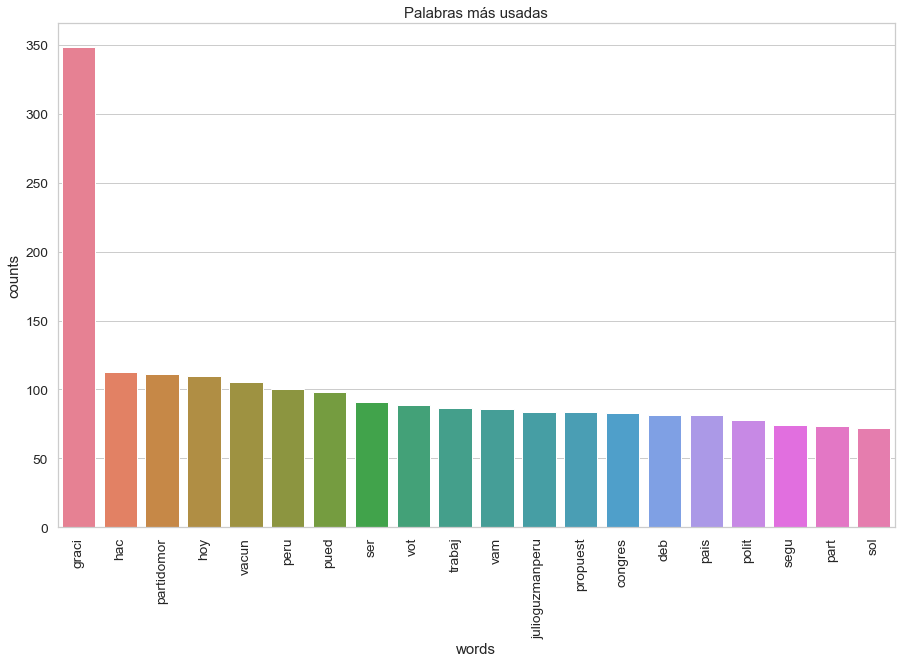

In [25]:
# Load the library with the TFidfVectorizer method
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer, _title):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title=_title)
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = TfidfVectorizer()
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(tweets['tweet_text_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer, "Palabras más usadas")

In [26]:
import umap
#import umap.plot

tfidf_embedding = umap.UMAP(metric='cosine').fit_transform(count_data)
umap_df = pd.DataFrame(tfidf_embedding, columns=['Component 1', 'Component 2'], index=tweets.index)
data_all = pd.concat([tweets, umap_df], axis=1)

D:\anaconda3\lib\site-packages\umap\umap_.py:125: UserWarning:

A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 18540 edges.
It has only fully disconnected 1015 vertices.
Use umap.utils.disconnected_vertices() to identify them.



In [27]:
category = "political_party"

colormap = {v: i for i, v in enumerate(data_all[category].unique())}
data_all["color"] = data_all[category].map(colormap)

In [28]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

title = "Tweets de los congresistas"

text = []
for row in tweets.iterrows():
    tooltip = "<br>".join([f"<b>{row[1].index[38]}</b>: {row[1][row[1].index[38]]}",
                           f"<b>{row[1].index[6]}</b>: {row[1][row[1].index[6]]}"])
    text.append(tooltip)

print(len(text))

fig_data = [
    go.Scatter(
        x=data_all["Component 1"],
        y=data_all["Component 2"],
        text=text,
        mode="markers",
        hoverinfo="text",
        marker={"color": data_all["color"], "colorscale" : "RdBu"},
    )
]

layout = {"hovermode": "closest", "title" : title}

figure = go.Figure(data=fig_data, layout=layout)

iplot(figure)

12310


In [29]:
partidos_tweets_ids = {'accion_popular': [],
    'alianza_progreso': [],
    'avanza_pais': [],
    'fuerza_popular': [],
    'juntos_peru': [],
    'partido_morado': [],
    'peru_libre': [],
    'renovacion_popular': [],
    'somos_peru': []}

for i in range(0, len(data_all)):
    partidos_tweets_ids[data_all.iloc[i]['political_party']].append(i)

    

In [30]:
import scipy
from scipy.sparse import csr_matrix

dense_matrix = scipy.sparse.csr_matrix.todense(count_data)

In [31]:

temp = (np.asarray(dense_matrix[0,:])).flatten()
print(len(temp))

print(len(partidos_tweets_ids['fuerza_popular']))

12475
2121


In [32]:
temp_res = []
for key, value in partidos_tweets_ids.items():
    temp = dense_matrix[value, :].sum(axis=0)
    temp = np.squeeze(np.asarray(temp))
    for i in range(0, len(temp)):
        temp[i] = temp[i] / len(value)
    temp_res.append(csr_matrix(temp))

In [33]:
count_data_political_party = scipy.sparse.vstack(temp_res, format='csr')

In [34]:
name_political_party_df = pd.DataFrame({'political_party': ['accion_popular','alianza_progreso','avanza_pais','fuerza_popular', 'juntos_peru','partido_morado','peru_libre','renovacion_popular','somos_peru']})

tfidf_embedding = umap.UMAP(metric='cosine').fit_transform(count_data_political_party)
umap_political_party_df = pd.DataFrame(tfidf_embedding,
                                       columns=['Component 1', 'Component 2'],
                                       index=name_political_party_df.index)
data_political_party = pd.concat([name_political_party_df, umap_political_party_df], axis=1)
data_political_party["color"] = data_political_party[category].map(colormap)

D:\anaconda3\lib\site-packages\umap\umap_.py:2213: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



In [35]:
text = []
for row in data_political_party.iterrows():
    tooltip = "<br>".join([f"<b>{row[1].index[0]}</b>: {row[1][row[1].index[0]]}"])
    text.append(tooltip)



fig_data = [
    go.Scatter(
        x=data_political_party["Component 1"],
        y=data_political_party["Component 2"],
        text=text,
        mode="markers",
        hoverinfo="text",
        marker={"color": data_political_party["color"], "colorscale" : "RdBu"},
    )
]

layout = {"hovermode": "closest", "title" : "Partidos politicos"}

figure = go.Figure(data=fig_data, layout=layout)

iplot(figure)


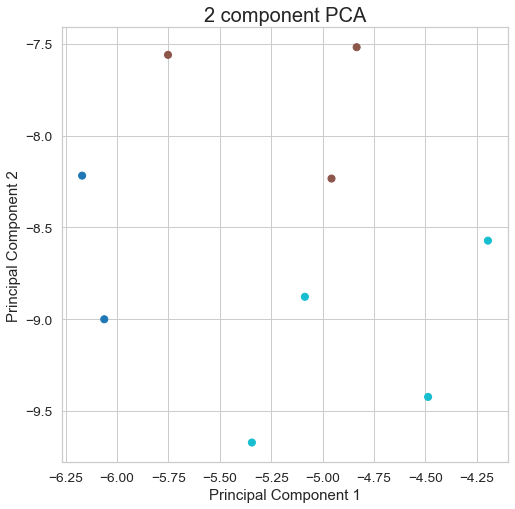

In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

# k-Means
kmeans = KMeans(n_clusters=3).fit(umap_political_party_df)
centroids = kmeans.cluster_centers_
kmeans.labels_.astype(float)

for x,y in zip(umap_political_party_df.loc[:, 'Component 1'],
               umap_political_party_df.loc[:, 'Component 2']):

    # this method is called for each point
    plt.annotate("", # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.scatter(umap_political_party_df['Component 1'], umap_political_party_df['Component 2'], c=kmeans.labels_.astype(float), s=50, cmap="tab10")

plt.show()

In [36]:
congresistas = ['wilsonsotop','robertochiabra', 'SalhuanaE','1DianaGonzales', 'adrianatudelag', 'AlejandroCavero', 'Gral_Williams', 'RosselliAmuruz',

'A_Aguinaga', 'CesarManuelRev1', 'ErnesBustamante', 'hventuraangel', 'LizarzaburuJuan', 'marthamoyano', 'NanoGuerra4', 'patty_juarez_', 'rosangelak8',

'chabelita2020', 'RoberthoSanchez', 'ruthlib_', 'sigridbazan',

'EdMalagaTrillo', 'FlorPabloMedina', 'suselparedes',

'flaviocruzmaman', 'GonzaAmerico', 'Mariaagueroguti',

'Alm_Montoya', 'AMunante11', 'JoseCuetoAservi', 'NormaYarrow4', 'EsdrasMinaya',

'alfredoazurin15', 'MartinVizcarraC']

congressman_political_party = ['accion_popular', 'alianza_progreso', 'alianza_progreso', 'avanza_pais', 'avanza_pais', 'avanza_pais', 'avanza_pais', 'avanza_pais',

'fuerza_popular', 'fuerza_popular', 'fuerza_popular', 'fuerza_popular', 'fuerza_popular', 'fuerza_popular', 'fuerza_popular', 'fuerza_popular', 'fuerza_popular',

'juntos_peru', 'juntos_peru', 'juntos_peru', 'juntos_peru', 

'partido_morado', 'partido_morado', 'partido_morado',

'peru_libre', 'peru_libre', 'peru_libre', 

'renovacion_popular', 'renovacion_popular', 'renovacion_popular', 'renovacion_popular', 'renovacion_popular', 

'somos_peru', 'somos_peru']

congresistas_tweets_ids = {}

for i in congresistas:
    congresistas_tweets_ids[i] = []

print(len(congresistas))
print(len(congressman_political_party))

34
34


In [37]:
for i in range(0, len(data_all)):
    congresistas_tweets_ids[data_all.iloc[i]['username']].append(i)

In [38]:
temp_res = []
for key, value in congresistas_tweets_ids.items():
    temp = dense_matrix[value, :].sum(axis=0)
    temp = np.squeeze(np.asarray(temp))
    for i in range(0, len(temp)):
        temp[i] = temp[i] / len(value)
    temp_res.append(csr_matrix(temp))
count_data_congressman = scipy.sparse.vstack(temp_res, format='csr')

name_congressman_df = pd.DataFrame({'name': congresistas,
                                    'political_party': congressman_political_party})

tfidf_embedding = umap.UMAP(metric='cosine').fit_transform(count_data_congressman)
umap_congressman_df = pd.DataFrame(tfidf_embedding,
                                   columns=['Component 1', 'Component 2'],
                                   index=name_congressman_df.index)

data_congressman = pd.concat([name_congressman_df, umap_congressman_df], axis=1)

colormap = {v: i for i, v in enumerate(data_congressman[category].unique())}
data_congressman["color"] = data_congressman[category].map(colormap)


In [39]:
data_congressman

,name,political_party,Component 1,Component 2,color
0,wilsonsotop,accion_popular,6.055840,22.308687,0
1,robertochiabra,alianza_progreso,5.200679,21.582411,1
2,SalhuanaE,alianza_progreso,5.699689,20.483852,1
3,1DianaGonzales,avanza_pais,8.442470,21.686060,2
4,adrianatudelag,avanza_pais,7.880509,19.693394,2
5,AlejandroCavero,avanza_pais,8.383858,21.145319,2
6,Gral_Williams,avanza_pais,7.376215,22.391415,2
7,RosselliAmuruz,avanza_pais,6.858974,22.460047,2
8,A_Aguinaga,fuerza_popular,6.294377,20.457691,3
9,CesarManuelRev1,fuerza_popular,7.165281,21.664663,3


In [40]:
text = []
for row in data_congressman.iterrows():
    tooltip = "<br>".join([f"<b>{row[1].index[0]}</b>: {row[1][row[1].index[0]]}"])
    text.append(tooltip)



fig_data = [
    go.Scatter(
        x=data_congressman["Component 1"],
        y=data_congressman["Component 2"],
        text=text,
        mode="markers",
        hoverinfo="text",
        marker={"color": data_congressman["color"], "colorscale" : "RdBu"},
    )
]

layout = {"hovermode": "closest", "title" : "Congresistas"}

figure = go.Figure(data=fig_data, layout=layout)

iplot(figure)

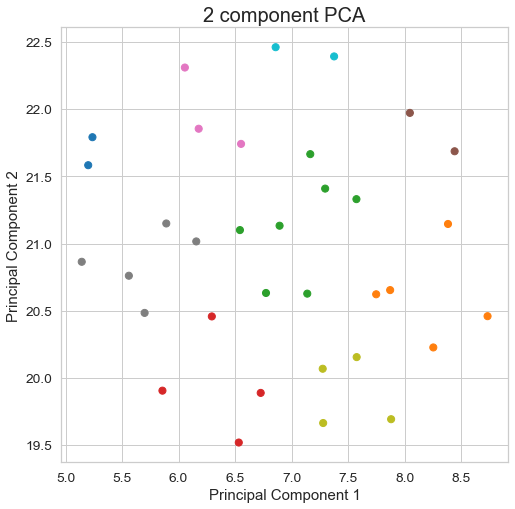

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

# k-Means
kmeans = KMeans(n_clusters=9).fit(umap_congressman_df)
centroids = kmeans.cluster_centers_
kmeans.labels_.astype(float)

for x,y in zip(umap_congressman_df.loc[:, 'Component 1'],
               umap_congressman_df.loc[:, 'Component 2']):

    # this method is called for each point
    plt.annotate("", # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.scatter(umap_congressman_df['Component 1'], umap_congressman_df['Component 2'], c=kmeans.labels_.astype(float), s=50, cmap="tab10")

plt.show()